In [1]:
from IPython.display import Image
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 300, 300
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('Train_SU63ISt.csv')

In [3]:
print(data.head())
print(data.dtypes)
data.shape

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
ID           int64
Datetime    object
Count        int64
dtype: object


(18288, 3)

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [5]:
data = data.set_index('Datetime')

In [6]:
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


The data contains traffic data of JetRail - a new form of Transformation. But this is still not read as a time-series (TS) object as the data types are ‘int’, ‘object’ and ‘int’. In order to read the data as a time series, we have to use the following pd.to_datetime function:

In [ ]:
# data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
# print(data.head())
# print(data.dtypes)

In [ ]:
data.head()

In [ ]:
# data = data.drop('ID', axis = 1)

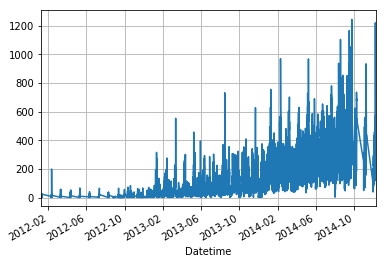

In [7]:
data.Count.plot(kind='line', grid=True)

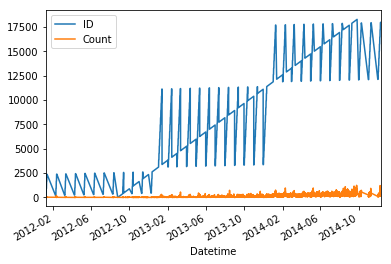

In [8]:
data.plot()

In [ ]:
# a = pd.date_range(start='2012-08-25 00:00:00', end='2014-09-25 23:00:00', freq = 'h')
# print(a.shape)

# c = data['Count']
# li = []
# for i in c:
#     li.append(i)

# b = pd.Series(li, index=a)

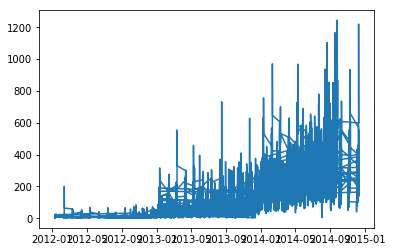

In [9]:
# basic plot
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot('Count', data = data);
ax1.legend = None;

In [10]:
# Too Much Data ?
# Try sampling it to 1 / 100th
one_hundred = data.sample(frac=0.01, random_state=np.random.randint(10))
print(one_hundred.shape)

(183, 2)


In [11]:
one_hundred.head()

,ID,Count
Datetime,,
2013-05-31 18:00:00,6714,70
2013-11-14 14:00:00,10718,180
2013-10-28 16:00:00,10312,208
2013-11-15 16:00:00,10744,142
2013-04-12 22:00:00,11206,244


In [12]:
# Look at the ID's & Dates
# They are random. So we need to order it in ascending
# It is necessary for plotting a line graph
one_hundred = one_hundred.sort_values(by='ID', ascending=True)
one_hundred.head()

,ID,Count
Datetime,,
2012-08-30 17:00:00,137,2
2012-01-09 09:00:00,177,2
2012-05-09 15:00:00,279,4
2012-05-09 16:00:00,280,2
2012-07-09 09:00:00,321,4


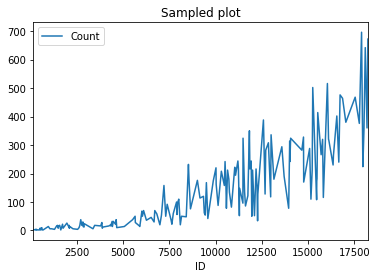

In [13]:
axes = one_hundred.plot('ID', 'Count' , title = 'Sampled plot');
axes.legend = None

# Rolling Mean Plot

A moving average (rolling average or running average) is a calculation to analyze data points by creating series of averages of different subsets of the full data set.

Moving averages are lagging indicators, which means that they do not predict new trends, but confirm trends once they have been established.

In [14]:
# We will add another column 'Rolling_Mean' in our original dataframe to see the trends.
# We will use pandas function pandas.DatFrame.rolling() function
# For more information : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html


one_hundred['Rolling_mean'] = one_hundred['Count'].rolling(window = 12).mean()
one_hundred.head()

,ID,Count,Rolling_mean
Datetime,,,
2012-08-30 17:00:00,137,2,NaN
2012-01-09 09:00:00,177,2,NaN
2012-05-09 15:00:00,279,4,NaN
2012-05-09 16:00:00,280,2,NaN
2012-07-09 09:00:00,321,4,NaN


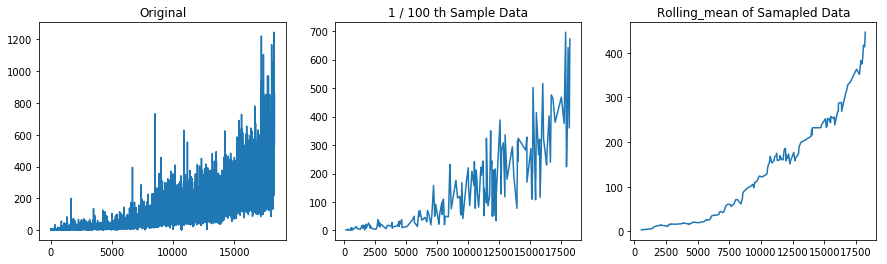

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axes[0].plot('ID', 'Count', data = data)
axes[0].set_title('Original')
axes[0].legend = None
axes[1].plot('ID', 'Count', data = one_hundred)
axes[1].set_title('1 / 100 th Sample Data')
axes[1].legend = None
axes[2].plot('ID', 'Rolling_mean', data = one_hundred)
axes[2].set_title('Rolling_mean of Samapled Data')
axes[2].legend = None

In [16]:
yearly = pd.DataFrame()
yearly['Count'] = data.Count.resample('M').sum()
yearly_12 = yearly[0:12]
yearly_13 = yearly[12:24]
yearly_14 = yearly[24:]

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


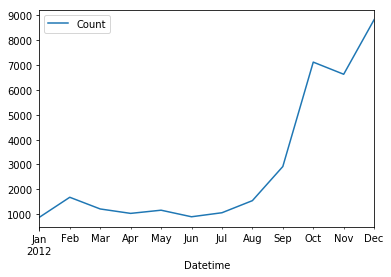

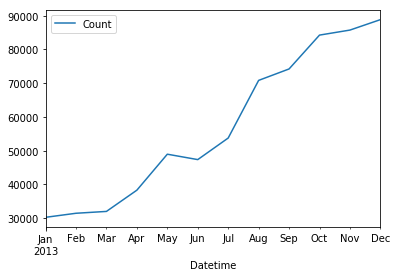

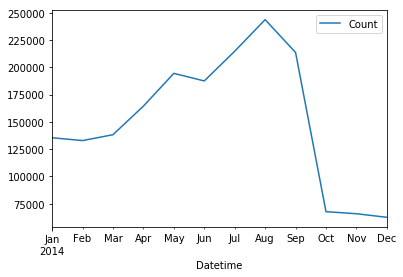

In [17]:
print(yearly_12.plot(), yearly_13.plot(), yearly_14.plot())

In [ ]:
data_2012 = data["2012"]
data_2013 = data["2013"]
data_2014 = data["2014"]

In [ ]:
l = [data_2012, data_2013, data_2014]
for i in l:
    i['Rolling_mean'] = i['Count'].rolling(window = 12).mean()

In [ ]:
data_2012.plot()

In [ ]:
data_train = pd.DataFrame(data_2012)
data_train = data_2013
data_train.drop('Rolling_mean', axis = 1)

# Data preparation for LSTM

Check for null values

In [ ]:
data.isnull().sum()

# LSTM - Recurrent Neural Network

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Model


model = Sequential()


model.add(LSTM(input_dim=1, 
              output_dim=50, 
              return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(100, 
              return_sequences = False))
model.add(Dropout(0.2))


model.add(Dense(output_dim=1))
model.add(Activation('linear'))


start = time.time()

model.compile(loss='mse', optimizer='rmsprop')

print("Compilation time : ", time.time() - start)

In [ ]:
model.fit(X_train,
         y_train,
         batch_size = 512,
         nb_epoch = 1, 
         )